![](https://images.unsplash.com/photo-1512436991641-6745cdb1723f?ixlib=rb-1.2.1&ixid=eyJhcHBfaWQiOjEyMDd9&auto=format&fit=crop&w=1050&q=80)

Photo by [Lauren Fleischmann](https://unsplash.com/photos/R2aodqJn3b8)

In this exercise, we will try to use a neural network on a simple classification task: classifying images of clothes into 10 classes.

We will first download the data:

In [135]:
import keras
from keras.models import Sequential
from keras.layers import Dense, Input

In [136]:
from tensorflow.keras.datasets import fashion_mnist

(X_train, y_train), (X_test, y_test) = fashion_mnist.load_data()

This dataset contains 10 classes:
* 0:	T-shirt/top
* 1:	Trouser
* 2:	Pullover
* 3:	Dress
* 4:	Coat
* 5:	Sandal
* 6:	Shirt
* 7:	Sneaker
* 8:	Bag
* 9:	Ankle boot

Now begin by exploring the data. Try to display some images with the associated label.

In [137]:
# TODO: Explore the data, display some input images

X_train.shape

(60000, 28, 28)

In [138]:
## nb of classes
import numpy as np
nb_classes = len(np.unique(y_train))
# 0 to 9 
nb_classes


10

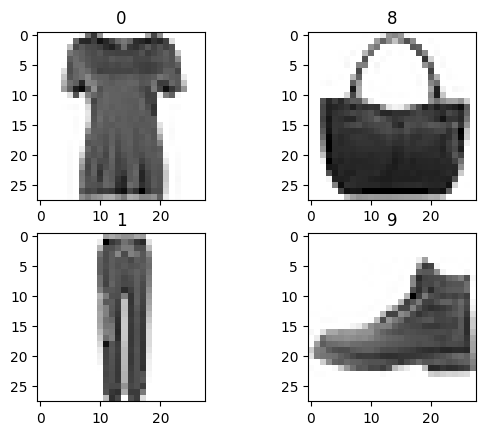

In [139]:
from matplotlib import pyplot as plt
import numpy as np

def multiplots(X, y):
    # voir pour générer les rows randomly
    rows = [10, 100, 1000, 50000] 
    fig, axs = plt.subplots(2, 2)    
    
    for i in range(2):
        for j in range(2):
            row = 2 * i + j
            imag = X[rows[row]]
            imag = np.array(imag, dtype='float')
            pixels = imag.reshape((28, 28))
            axs[i, j].imshow(pixels, cmap='gray_r')
            axs[i, j].set_title(y[rows[row]])
    
multiplots(X_train, y_train)

**Before going further**: what methods could you use to perform such a classification task?

### - LogisticRegression
### - XGBoostClassifier

---

The first method you will try is using neural networks. First step is the data preparation: data rescaling, label preparation.

Hint: you can use the Keras function `to_categorical`

In [140]:
# TODO: Make the data preparation
# flatten arrays
X_flat_train = X_train.reshape(X_train.shape[0],-1)
X_flat_test  = X_test.reshape(X_test.shape[0],-1)

## SCALE THE FEATURES (pixels grey levels)
# numeric features scaling
from sklearn.preprocessing import MinMaxScaler

X_flat_train.shape

scaler = MinMaxScaler()
#X_train = scaler.fit_transform(X_flat_train) ## ??!! NN accuracy pas cool
#X_test  = scaler.transform(X_flat_test)
X_train = X_flat_train/255.
X_test = X_flat_test/255.

In [141]:
X_train.shape

(60000, 784)

In [142]:
### transform target to categorical matrix
## stackoverflow
y_train_cat = keras.utils.to_categorical(y_train, num_classes=nb_classes)
y_test_cat = keras.utils.to_categorical(y_test, num_classes=nb_classes)

Next step: model building with Keras. Build your neural network architecture. At first, I would recommend a light architecture: no more than 2 hidden layers, with about 10 units per layer. Put that model into a function, so that you can reuse it later.

In [143]:
# TODO: Build your model
# COURS B.ROLAND
def multi_class_mlp(input_dim: tuple[int, ...], nb_layers: int, nb_units: int, nb_outputs: int) -> Sequential:
    # Sequential model
    model = Sequential()

    # Input
    model.add(Input(input_dim))

    # Loop onto Hidden Layers
    for lay in range(nb_layers):
        model.add(Dense(nb_units, activation="sigmoid"))

    # Output Layers
    model.add(Dense(nb_outputs, activation="softmax")) #??!! sigmoid pas bon; softmax transforme le vect issu de l'activitation en vect de probas des 10 classes

    return model

inp_dim = X_train.shape[1] 
mlp = multi_class_mlp(input_dim=(inp_dim,),nb_layers=2, nb_units=10, nb_outputs=nb_classes)
mlp.summary()

Model: "sequential_14"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_42 (Dense)            (None, 10)                7850      
                                                                 
 dense_43 (Dense)            (None, 10)                110       
                                                                 
 dense_44 (Dense)            (None, 10)                110       
                                                                 
Total params: 8,070
Trainable params: 8,070
Non-trainable params: 0
_________________________________________________________________


Now compile and fit your model on your training data. Since this is a multiclass classification, the loss is not `binary_crossentropy` anymore, but `categorical_crossentropy`.

In [144]:
# TODO: Compile and fit your model
print(X_train.shape)
print(X_test.shape)
print(y_train_cat.shape)
print(y_test_cat.shape)

## COURS
from keras.optimizers import SGD

mlp.compile(optimizer=SGD(learning_rate=0.45), loss="categorical_crossentropy", metrics=["accuracy"])

mlp.fit(x=X_train, y=y_train_cat, validation_data=(X_test, y_test_cat), epochs=25, batch_size=100)

### loss difficile à interpréter ! entropie categ. croisée
### autre point: categ. -> sparse.catg sans avoir besoin de 1-hot-encode 

(60000, 784)
(10000, 784)
(60000, 10)
(10000, 10)
Epoch 1/25
600/600 [==============================] - 1s 2ms/step - loss: 1.3109 - accuracy: 0.5406 - val_loss: 0.9545 - val_accuracy: 0.6211
Epoch 2/25
600/600 [==============================] - 1s 2ms/step - loss: 0.7047 - accuracy: 0.7520 - val_loss: 0.6162 - val_accuracy: 0.7957
Epoch 3/25
600/600 [==============================] - 1s 2ms/step - loss: 0.5632 - accuracy: 0.8094 - val_loss: 0.6110 - val_accuracy: 0.7957
Epoch 4/25
600/600 [==============================] - 1s 2ms/step - loss: 0.5088 - accuracy: 0.8276 - val_loss: 0.5082 - val_accuracy: 0.8249
Epoch 5/25
600/600 [==============================] - 1s 2ms/step - loss: 0.4798 - accuracy: 0.8350 - val_loss: 0.4949 - val_accuracy: 0.8288
Epoch 6/25
600/600 [==============================] - 1s 2ms/step - loss: 0.4582 - accuracy: 0.8419 - val_loss: 0.5069 - val_accuracy: 0.8234
Epoch 7/25
600/600 [==============================] - 1s 2ms/step - loss: 0.4457 - accuracy: 0.845

Once your model has been trained, compute the accuracy (and other metrics if you want) on the train and test dataset.

Be careful, Keras returns softmax output (so an array of 10 values between 0 and 1, for which the sum is equal to 1). To compute correctly the accuracy, you have to convert that array into a categorical array with zeros and a 1.

In [145]:
# TODO: Compute the accuracy of your model
mlp.predict(X_test[:5])

1/1 [==============================] - 0s 44ms/step


array([[4.0631330e-05, 2.9408376e-10, 2.2379785e-07, 8.0758009e-06,
        6.3638026e-08, 5.7540932e-03, 7.2947689e-05, 1.5975107e-02,
        6.2577223e-05, 9.7808629e-01],
       [2.2876449e-03, 1.9629952e-04, 9.4568789e-01, 1.2304875e-04,
        1.9908307e-02, 2.5541036e-05, 3.1090094e-02, 8.5988660e-07,
        6.8028702e-04, 2.9375059e-08],
       [5.1621901e-04, 9.8987561e-01, 1.5388437e-03, 2.1051520e-03,
        5.6092436e-03, 2.1100298e-07, 3.3614851e-04, 3.6614900e-08,
        1.8505014e-05, 6.8999133e-11],
       [9.0834474e-05, 9.9616134e-01, 2.6602784e-04, 1.8950732e-03,
        1.5240759e-03, 6.2233215e-07, 4.8314432e-05, 8.8266646e-08,
        1.3695905e-05, 3.5554906e-11],
       [1.9649045e-01, 2.3980688e-06, 1.3136487e-02, 5.8093909e-03,
        2.0018893e-03, 2.6637511e-04, 7.8138274e-01, 2.0939908e-07,
        7.8626012e-04, 1.2381906e-04]], dtype=float32)

What do you think of those results? Can you improve it by changing the number of layers? Of units per layer? The number of epochs? The activation functions?

You should try!

In [ ]:
#loss, acc = mlp.evaluate()

---

In order to compare your results with more traditional machine learning methods, you will do this work with another method: a PCA followed by a classification model (of your choice). Of course, you will perform hyperparameter optimization using a gridsearch on that model!

Fit your model and display the performances.

In [146]:
from sklearn.decomposition import PCA

pca = PCA(n_components=80)
X_train_PCA = pca.fit_transform(X_train)
X_test_PCA = pca.transform(X_test)

In [155]:
# TODO: Redo the classification with PCA and classification model
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import classification_report, f1_score

param_grid = {
    "solver": ["lbfgs"],
}

clf = GridSearchCV(
        LogisticRegression(max_iter=500),
        param_grid,
        cv=3,
    )

clf.fit(X_train_PCA, y_train)


/home/michaelfaivre/.pyenv/versions/3.10.12/envs/artefact/lib/python3.10/site-packages/sklearn/linear_model/_logistic.py:460: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
/home/michaelfaivre/.pyenv/versions/3.10.12/envs/artefact/lib/python3.10/site-packages/sklearn/linear_model/_logistic.py:460: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
   

GridSearchCV(cv=3, estimator=LogisticRegression(max_iter=500),
             param_grid={'solver': ['lbfgs']})

In [156]:
f1_score_ = f1_score(y_test, clf.predict(X_test_PCA), average = 'weighted')
#print(f'f1 score on test: {f1_score}')
f1_score_

0.8364070736215635

: 

Did the neural network improve significantly the performances? Can you explain why?

If you still have time, you could try to use scikit-learn's `Pipeline` to perform the hyperparameter optimization jointly on the PCA and the classification model. This might improve your performances.